In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# 数据载入

In [2]:
etf50 = pd.read_pickle('data\etf\etf50Vol.pkl')
etf300 = pd.read_pickle('data\etf\etf300Vol.pkl')
etf50.head(n=1)

,datetime,close,return,hv5,hv10,hv20,hv30,hv60
0,2020-03-25,2.687,0.022583,0.426686,0.374157,0.350107,0.300291,0.286683


In [3]:
opt50Price = pd.read_pickle('data\option\etf50Opt.pkl')
opt300Price = pd.read_pickle('data\option\etf300Opt.pkl')

In [4]:
etf50Risk = pd.read_pickle('data\option\etf50Risk.pkl')
etf300Risk = pd.read_pickle('data\option\etf300Risk.pkl')
etf50Risk.head(n=1)

,datetime,optionCode,multiplier,option_type,maturity,synthetic_futures_price,underlying_price,is_at_the_money,iv,delta,gamma,theta,vega,rho
0,2020-01-02,OP10001909,10163.0,认购,53.0,3.093599,3.081,False,0.186,0.951227,0.375469,-0.137782,0.146382,0.554473


In [5]:
etf50Atm = etf50Risk[etf50Risk['is_at_the_money']==True].reset_index(drop=True)
etf50AtmCall = etf50Atm[etf50Atm['option_type']=='认购'].reset_index(drop=True)
etf50AtmPut = etf50Atm[etf50Atm['option_type']=='认沽'].reset_index(drop=True)
etf50AtmCallCur = etf50AtmCall.groupby(['datetime']).apply(lambda x: x[x['maturity']==x['maturity'].min()]).reset_index(drop=True)
etf50AtmPutCur = etf50AtmPut.groupby(['datetime']).apply(lambda x: x[x['maturity']==x['maturity'].min()]).reset_index(drop=True)

In [6]:
etf300Atm = etf300Risk[etf300Risk['is_at_the_money']==True].reset_index(drop=True)
etf300AtmCall = etf300Atm[etf300Atm['option_type']=='认购'].reset_index(drop=True)
etf300AtmPut = etf300Atm[etf300Atm['option_type']=='认沽'].reset_index(drop=True)
etf300AtmCallCur = etf300AtmCall.groupby(['datetime']).apply(lambda x: x[x['maturity']==x['maturity'].min()]).reset_index(drop=True)
etf300AtmPutCur = etf300AtmPut.groupby(['datetime']).apply(lambda x: x[x['maturity']==x['maturity'].min()]).reset_index(drop=True)

In [7]:
etf50AtmCallCur = etf50AtmCallCur[etf50AtmCallCur['maturity']!=0].reset_index(drop=True)
etf50AtmPutCur = etf50AtmPutCur[etf50AtmPutCur['maturity']!=0].reset_index(drop=True)
etf300AtmCallCur = etf300AtmCallCur[etf300AtmCallCur['maturity']!=0].reset_index(drop=True)
etf300AtmPutCur = etf300AtmPutCur[etf300AtmPutCur['maturity']!=0].reset_index(drop=True)

# 数据分析

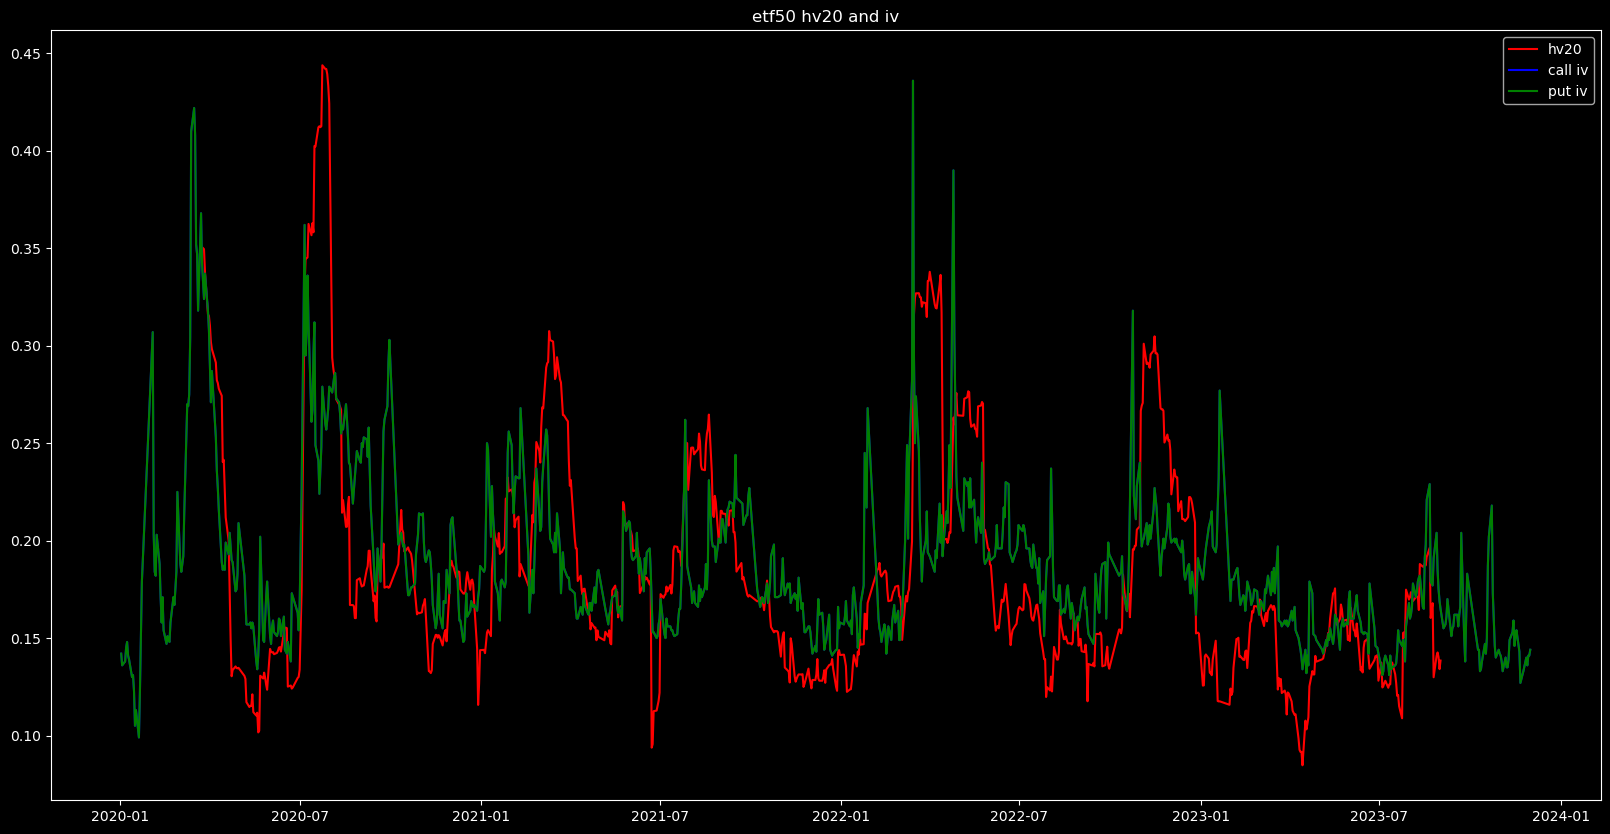

In [8]:
# 可视化etf50的hv20走势和iv走势，横轴为datetime，画在一张图内,用两种颜色
plt.figure(figsize=(20,10))
plt.plot(pd.to_datetime(etf50['datetime']), etf50['hv20'], color='red', label='hv20')
plt.plot(pd.to_datetime(etf50AtmCallCur['datetime']), etf50AtmCallCur['iv'], color='blue', label='call iv')
plt.plot(pd.to_datetime(etf50AtmPutCur['datetime']), etf50AtmPutCur['iv'], color='green', label='put iv')
plt.legend()
plt.title('etf50 hv20 and iv')
plt.show()

In [9]:
# 将iv数据拼接到etf50中，按照datetime
etf50['datetime'] = pd.to_datetime(etf50['datetime'])
etf50 = etf50.merge(etf50AtmCallCur[['datetime', 'iv']], on='datetime', how='left').dropna().reset_index(drop=True) 
etf50.head(n=5)

,datetime,close,return,hv5,hv10,hv20,hv30,hv60,iv
0,2020-03-26,2.677,-0.003729,0.375485,0.372539,0.349595,0.300227,0.286541,0.324
1,2020-03-27,2.692,0.005588,0.352941,0.373234,0.337773,0.300233,0.286934,0.337
2,2020-03-30,2.680,-0.004468,0.239808,0.316082,0.316123,0.293733,0.286369,0.318
3,2020-03-31,2.675,-0.001867,0.179057,0.315384,0.315259,0.293235,0.286235,0.308
4,2020-04-01,2.671,-0.001496,0.063085,0.292450,0.310446,0.293142,0.284348,0.290


In [10]:
etf50['irRatio'] = etf50['iv'] / etf50['hv20']
etf50['irRatio'].describe()

count    796.000000
mean       1.073418
std        0.235776
min        0.542846
25%        0.917731
50%        1.061712
75%        1.226051
max        2.356373
Name: irRatio, dtype: float64

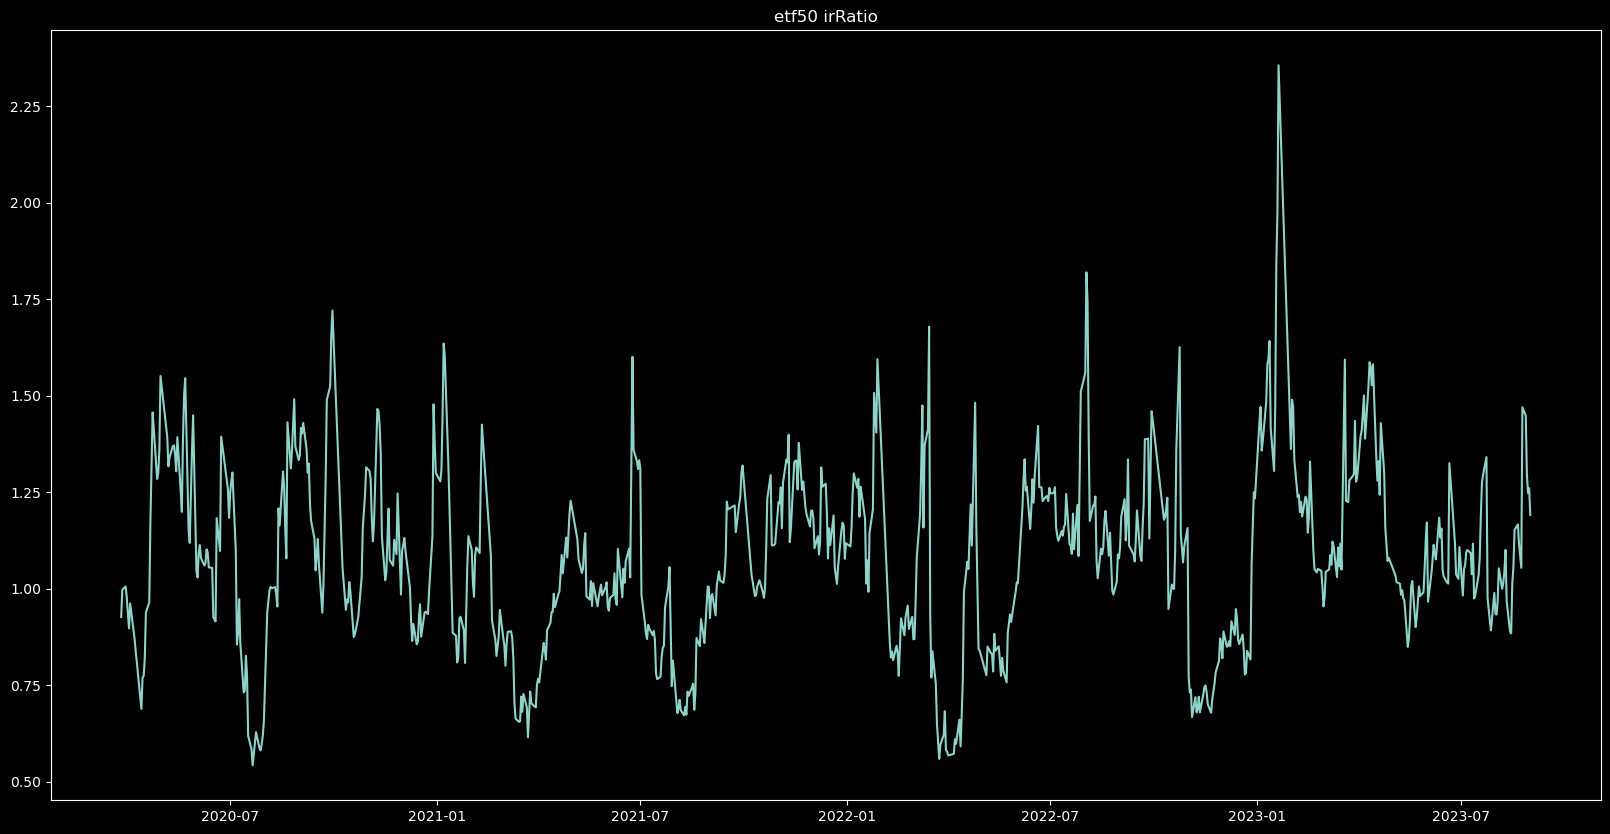

In [11]:
# visualise the irRatio
plt.figure(figsize=(20,10))
plt.plot(etf50['datetime'], etf50['irRatio'])
plt.title('etf50 irRatio')
plt.show()

In [12]:
etf300['datetime'] = pd.to_datetime(etf300['datetime']) 
etf300 = etf300.merge(etf300AtmPutCur[['datetime', 'iv']], on='datetime', how='left').dropna().reset_index(drop=True)
etf300['irRatio'] = etf300['iv'] / etf300['hv20']
etf300['irRatio'].describe()

count    796.000000
mean       1.094170
std        0.247383
min        0.550702
25%        0.937493
50%        1.083341
75%        1.250036
max        2.914636
Name: irRatio, dtype: float64

In [13]:
# 相关性
etf50['irRatio'].corr(etf300['irRatio'])

0.910189341419544

In [14]:
# irRatio和close的相关系数
etf50['irRatio'].corr(etf50['return'])

-0.06134722975328095

In [15]:
etf300['irRatio'].corr(etf300['return'])

-0.03537766891808735

In [16]:
etf300['return'].corr(etf50['return'])

0.9447372997711554

# 交易信号制定

In [17]:
# 计算irRatio的滚动20日50%和90%分位数
etf50['Ratio90'] = etf50['irRatio'].rolling(20).quantile(0.9)
etf50['Ratio50'] = etf50['irRatio'].rolling(20).quantile(0.5)
etf300['Ratio90'] = etf300['irRatio'].rolling(20).quantile(0.9)
etf300['Ratio50'] = etf300['irRatio'].rolling(20).quantile(0.5)

In [18]:
# 将etf50和etf300数据合并
etf = etf50.merge(etf300, on='datetime', how='left', suffixes=('_50', '_300'))
etf = etf.dropna().reset_index(drop=True)
etf

,datetime,close_50,return_50,hv5_50,hv10_50,hv20_50,hv30_50,hv60_50,iv_50,irRatio_50,...,return_300,hv5_300,hv10_300,hv20_300,hv30_300,hv60_300,iv_300,irRatio_300,Ratio90_300,Ratio50_300
0,2020-04-24,2.765,-0.007925,0.121183,0.148519,0.133574,0.240618,0.290138,0.189,1.414946,...,-0.008408,0.129756,0.138579,0.141546,0.237945,0.316285,0.199,1.405899,1.149233,0.921674
1,2020-04-27,2.790,0.009001,0.141242,0.150147,0.135441,0.238829,0.285827,0.174,1.284691,...,0.004475,0.130580,0.134997,0.141509,0.234914,0.310726,0.188,1.328538,1.336274,0.929575
2,2020-04-28,2.810,0.007143,0.112813,0.132167,0.134603,0.208023,0.237808,0.175,1.300116,...,0.006284,0.110479,0.111775,0.136684,0.199072,0.252672,0.188,1.375431,1.378477,0.929575
3,2020-04-29,2.829,0.006739,0.112603,0.125073,0.134479,0.207768,0.231099,0.183,1.360808,...,0.005207,0.098143,0.107517,0.136981,0.197228,0.245542,0.193,1.408959,1.406205,0.929575
4,2020-04-30,2.852,0.008097,0.111668,0.127099,0.134724,0.196285,0.231387,0.209,1.551314,...,0.014693,0.130905,0.124858,0.143528,0.192976,0.246546,0.216,1.504933,1.411892,0.929575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2023-08-28,2.596,0.012793,0.153078,0.148631,0.140845,0.172789,0.151891,0.204,1.448402,...,0.013909,0.169842,0.153972,0.143855,0.166835,0.148456,0.198,1.376382,1.175309,1.003649
773,2023-08-29,2.606,0.003845,0.149097,0.150520,0.142620,0.173065,0.148190,0.185,1.297153,...,0.005717,0.169378,0.159029,0.147078,0.167851,0.146193,0.179,1.217037,1.232972,1.008958
774,2023-08-30,2.599,-0.002690,0.088987,0.146616,0.140235,0.173010,0.147951,0.175,1.247908,...,-0.000259,0.098499,0.155354,0.146294,0.167852,0.145875,0.170,1.162047,1.232972,1.019397
775,2023-08-31,2.590,-0.003469,0.103560,0.146729,0.134069,0.172563,0.147725,0.169,1.260548,...,-0.004937,0.117884,0.154740,0.140483,0.167207,0.144855,0.163,1.160282,1.232972,1.033637


In [19]:
# 两侧irRario分别突破90分位数
inDateList = etf.loc[(etf['irRatio_50'] > etf['Ratio90_50']) & (etf['irRatio_300'] > etf['Ratio90_300']),'datetime'].tolist()
len(inDateList)

114

In [20]:
# 找到etf50AtmCallCur中dateList对应的行
etf50AtmCallCur['datetime'] = pd.to_datetime(etf50AtmCallCur['datetime'])
etf50AtmCallCur = etf50AtmCallCur.set_index('datetime')
opt50 = etf50AtmCallCur.loc[inDateList,:].reset_index(drop=False)
etf50AtmCallCur = etf50AtmCallCur.reset_index(drop=False)
opt50.head(n=1)

,datetime,optionCode,multiplier,option_type,maturity,synthetic_futures_price,underlying_price,is_at_the_money,iv,delta,gamma,theta,vega,rho
0,2020-04-24,OP10002438,10000.0,认购,20.0,2.74179,2.765,True,0.189,0.507089,2.677554,-0.40404,0.3144,0.110049


In [21]:
# 找到etf300AtmCallCur中dateList对应的行
etf300AtmPutCur['datetime'] = pd.to_datetime(etf300AtmPutCur['datetime'])
etf300AtmPutCur = etf300AtmPutCur.set_index('datetime')
# reset_index后重命名列为datetime
opt300 = etf300AtmPutCur.loc[inDateList,:].reset_index(drop=False)
etf300AtmPutCur =etf300AtmPutCur.reset_index(drop=False)

In [22]:
# 将etf50和etf300的数据合并
opt = opt50.merge(opt300, on='datetime', how='left', suffixes=('_50', '_300'))
opt.head(n=1)

,datetime,optionCode_50,multiplier_50,option_type_50,maturity_50,synthetic_futures_price_50,underlying_price_50,is_at_the_money_50,iv_50,delta_50,...,maturity_300,synthetic_futures_price_300,underlying_price_300,is_at_the_money_300,iv_300,delta_300,gamma_300,theta_300,vega_300,rho_300
0,2020-04-24,OP10002438,10000.0,认购,20.0,2.74179,2.765,True,0.189,0.507089,...,20.0,3.74859,3.79,True,0.199,-0.565983,1.834799,-0.449647,0.424024,-0.184321


In [23]:
opt = opt[(opt['maturity_50']>=5)].reset_index(drop=True)
len(opt)

87

# backtest

## 未考虑持仓期内波动

In [24]:
dailyProfit = pd.DataFrame()
tradeInfo = pd.DataFrame()
for date in tqdm(opt['datetime'].to_list()):
    opt50Code = opt.loc[opt['datetime']==date, 'optionCode_50'].values[0]
    opt300Code = opt.loc[opt['datetime']==date, 'optionCode_300'].values[0]
    
    delta50 = opt.loc[opt['datetime']==date, 'delta_50'].values[0]
    delta300 = opt.loc[opt['datetime']==date, 'delta_300'].values[0]
    und50 = opt.loc[opt['datetime']==date, 'underlying_price_50'].values[0]
    und300 = opt.loc[opt['datetime']==date, 'underlying_price_50'].values[0]

    cashDelta50 = delta50 * und50
    cashDelta300 = delta300 * und300

    share300 = -10000
    share50 = -abs(share300 * cashDelta300 / cashDelta50)

    # date转换为str格式，年-月-日
    dateStr = date.strftime('%Y-%m-%d')
    inOpt50Price = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']==dateStr), 'close'].values[0]
    outDate50 = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']>dateStr), 'datetime'].to_list()[-2]

    inOpt300Price = opt300Price.loc[(opt300Price['optionCode']==opt300Code)&(opt300Price['datetime']==dateStr), 'close'].values[0]
    outDate300 = opt300Price.loc[(opt300Price['optionCode']==opt300Code)&(opt300Price['datetime']>dateStr), 'datetime'].to_list()[-2]

    '''
    # irRatio任一回归到50分位数
    if not etf.loc[(etf['datetime']>=dateStr)&((etf['irRatio_50'] < etf['Ratio50_50']) | (etf['irRatio_300'] < etf['Ratio50_300'])),'datetime'].empty:
        outDateIrRatio = etf.loc[(etf['datetime']>=dateStr)&((etf['irRatio_50'] < 1) | (etf['irRatio_300'] < 1)),'datetime'].to_list()[0]
    else:
        outDateIrRatio = outDate300
    '''
    
    outDate = min(outDate50, outDate300)
    # print('holding period:',(pd.to_datetime(outDate)-pd.to_datetime(date)).days)
    outOpt50Price = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']==outDate), 'close'].values[0]
    outOpt300Price = opt300Price.loc[(opt300Price['optionCode']==opt300Code)&(opt300Price['datetime']==outDate), 'close'].values[0]

    profit = (outOpt50Price - inOpt50Price) * share50 + (outOpt300Price - inOpt300Price) * share300
    commission = 1.7 * 2 * (abs(share50) + abs(share300))/10000
    slippage = 0.001 * 5 * 2 * (abs(share50) + abs(share300)) 

    dailyProfit = pd.concat([dailyProfit, pd.DataFrame({'datetime': [date], 'profit': [profit-commission-slippage]})], axis=0)
    tradeInfo = pd.concat([tradeInfo, pd.DataFrame({'datetime': [date], 'opt50Code': [opt50Code], 'opt300Code': [opt300Code], 'share50': [share50], 'share300': [share300],\
                                                     'inOpt50Price': [inOpt50Price], 'outOpt50Price': [outOpt50Price], 'inOpt300Price': [inOpt300Price], 'outOpt300Price': [outOpt300Price],\
                                                        'profit50':[(outOpt50Price - inOpt50Price) * share50],'profit300':[(outOpt300Price - inOpt300Price) * share300],\
                                                            'profit total':[profit]})], axis=0)

100%|██████████| 87/87 [00:02<00:00, 31.82it/s]


## 考虑持仓期内的波动

### 日度不调仓

In [25]:
opt.columns

Index(['datetime', 'optionCode_50', 'multiplier_50', 'option_type_50',
       'maturity_50', 'synthetic_futures_price_50', 'underlying_price_50',
       'is_at_the_money_50', 'iv_50', 'delta_50', 'gamma_50', 'theta_50',
       'vega_50', 'rho_50', 'optionCode_300', 'multiplier_300',
       'option_type_300', 'maturity_300', 'synthetic_futures_price_300',
       'underlying_price_300', 'is_at_the_money_300', 'iv_300', 'delta_300',
       'gamma_300', 'theta_300', 'vega_300', 'rho_300'],
      dtype='object')

In [26]:
dailyProfit = pd.DataFrame()
tradeInfo = pd.DataFrame()
for date in tqdm(opt['datetime'].to_list()):
    opt50Code = opt.loc[opt['datetime']==date, 'optionCode_50'].values[0]
    opt300Code = opt.loc[opt['datetime']==date, 'optionCode_300'].values[0]
    
    delta50 = opt.loc[opt['datetime']==date, 'delta_50'].values[0]
    delta300 = opt.loc[opt['datetime']==date, 'delta_300'].values[0]
    und50 = opt.loc[opt['datetime']==date, 'underlying_price_50'].values[0]
    und300 = opt.loc[opt['datetime']==date, 'underlying_price_50'].values[0]

    cashDelta50 = delta50 * und50
    cashDelta300 = delta300 * und300

    share300 = -10000
    share50 = -abs(share300 * cashDelta300 / cashDelta50)

    commission = 1.7 * 2 * (abs(share50) + abs(share300))/10000
    slippage = 0.001 * 5 * 2 * (abs(share50) + abs(share300))

    dateStr = date.strftime('%Y-%m-%d')  # date转换为str格式，年-月-日
    outDate50 = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']>dateStr), 'datetime'].to_list()[-2]
    outDate300 = opt300Price.loc[(opt300Price['optionCode']==opt300Code)&(opt300Price['datetime']>dateStr), 'datetime'].to_list()[-2]
    outDate = min(outDate50, outDate300)
    ddateList = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']>=dateStr)&(opt50Price['datetime']<=outDate), 'datetime'].to_list()
    for ddate in ddateList:
        ddateStr = ddate.strftime('%Y-%m-%d')
        # 第一天
        if ddate == ddateList[0]:
            inOpt50Price = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']==dateStr), 'close'].values[0]
            inOpt300Price = opt300Price.loc[(opt300Price['optionCode']==opt300Code)&(opt300Price['datetime']==dateStr), 'close'].values[0]
            profit = -commission-slippage
            
            inIv50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'iv'].values[0]
            inIv300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'iv'].values[0]
            inUnd50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'underlying_price'].values[0]
            inUnd300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'underlying_price'].values[0]

            delta50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'delta'].values[0]
            delta300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'delta'].values[0]
            gamma50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'gamma'].values[0]
            gamma300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'gamma'].values[0]
            vega50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'vega'].values[0]
            vega300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'vega'].values[0]
            theta50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'theta'].values[0]
            theta300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'theta'].values[0]

            deltaProfit = 0
            gammaProfit = 0
            vegaProfit = 0
            thetaProfit = 0
            greekProfit = 0
            otherProfit = profit - greekProfit
        else:
            outOpt50Price = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']==ddateStr), 'close'].values[0]
            outOpt300Price = opt300Price.loc[(opt300Price['optionCode']==opt300Code)&(opt300Price['datetime']==ddateStr), 'close'].values[0]
            profit = (outOpt50Price - inOpt50Price) * share50 + (outOpt300Price - inOpt300Price) * share300
            
            # 计算ds，dsigma，dt
            outIv50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'iv'].values[0]
            outIv300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'iv'].values[0]
            outUnd50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'underlying_price'].values[0]
            outUnd300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'underlying_price'].values[0]
        
            ds50 = outUnd50 - inUnd50
            ds300 = outUnd300 - inUnd300
            dsigma50 = outIv50 - inIv50
            dsigma300 = outIv300 - inIv300
            dt = 1/242

            # 收益分解
            deltaProfit = ds50 * delta50 * share50 + ds300 * delta300 * share300
            gammaProfit = 0.5 * (ds50**2) * gamma50 * share50 + 0.5 * (ds300**2) * gamma300 * share300
            vegaProfit = dsigma50 * vega50 * share50 + dsigma300 * vega300 * share300
            thetaProfit = dt * (theta50 * share50 + theta300 * share300)
            greekProfit = deltaProfit + gammaProfit + vegaProfit + thetaProfit
            otherProfit = profit - greekProfit
            #print('error raio:',(profit - greekProfit) / profit * 100)
            # 更新希腊字母
            delta50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'delta'].values[0]
            delta300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'delta'].values[0]
            gamma50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'gamma'].values[0]
            gamma300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'gamma'].values[0]
            vega50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'vega'].values[0]
            vega300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'vega'].values[0]
            theta50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'theta'].values[0]
            theta300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'theta'].values[0]
            # 更新价格
            inOpt50Price = outOpt50Price
            inOpt300Price = outOpt300Price
            inIv50 = outIv50
            inIv300 = outIv300
            inUnd50 = outUnd50
            inUnd300 = outUnd300
        dailyProfit = pd.concat([dailyProfit, pd.DataFrame({'datetime': [ddate], 'profit': [profit],'deltaProfit': [deltaProfit], 'gammaProfit': [gammaProfit],\
                                                                'vegaProfit': [vegaProfit], 'thetaProfit': [thetaProfit], 'greekProfit': [greekProfit], 'otherProfit': [otherProfit]})], axis=0)
        tradeInfo = pd.concat([tradeInfo, pd.DataFrame({'datetime': [ddate], 'opt50Code': [opt50Code], 'opt300Code': [opt300Code], 'share50': [share50], 'share300': [share300],\
                                                        'inOpt50Price': [inOpt50Price], 'outOpt50Price': [outOpt50Price], 'inOpt300Price': [inOpt300Price], 'outOpt300Price': [outOpt300Price],\
                                                            'profit50':[(outOpt50Price - inOpt50Price) * share50],'profit300':[(outOpt300Price - inOpt300Price) * share300],\
                                                                'profit total':[profit]})], axis=0)
dailyProfit = dailyProfit.groupby(['datetime']).sum().reset_index(drop=False)

100%|██████████| 87/87 [01:22<00:00,  1.05it/s]


### 业绩归因

deltaProfit: 33.54084559918245
gammaProfit: -125.30175468905327
vegaProfit: 15.56721843323145
thetaProfit: 130.96223326370622
greekProfit: 54.76854260706688


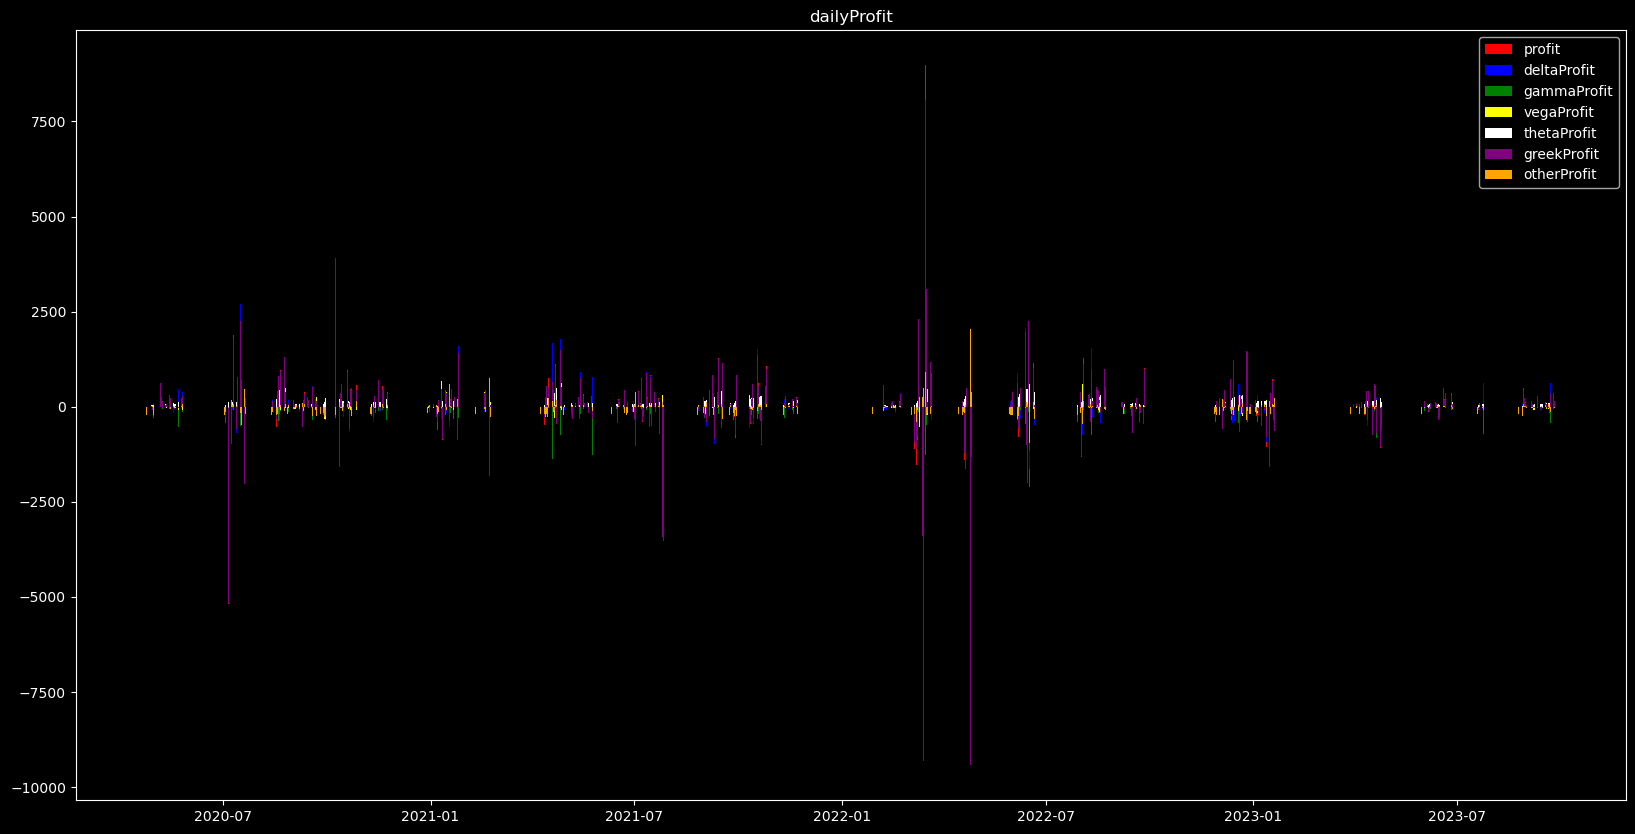

In [27]:
deltaProfit = dailyProfit['deltaProfit'].mean()
gammaProfit = dailyProfit['gammaProfit'].mean()
vegaProfit = dailyProfit['vegaProfit'].mean()
thetaProfit = dailyProfit['thetaProfit'].mean()
greekProfit = dailyProfit['greekProfit'].mean()
print('deltaProfit:', deltaProfit)
print('gammaProfit:', gammaProfit)
print('vegaProfit:', vegaProfit)
print('thetaProfit:', thetaProfit)
print('greekProfit:', greekProfit)
# 柱状图可视化
plt.figure(figsize=(20,10))
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['profit'], color='red', label='profit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['deltaProfit'], color='blue', label='deltaProfit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['gammaProfit'], color='green', label='gammaProfit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['vegaProfit'], color='yellow', label='vegaProfit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['thetaProfit'], color='white', label='thetaProfit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['greekProfit'], color='purple', label='greekProfit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['otherProfit'], color='orange', label='otherProfit')  
plt.legend()
plt.title('dailyProfit')
plt.show()

### 日度调仓

In [28]:
dailyProfit = pd.DataFrame()
tradeInfo = pd.DataFrame()
changeCount = 0
for date in tqdm(opt['datetime'].to_list()):
    opt50Code = opt.loc[opt['datetime']==date, 'optionCode_50'].values[0]
    opt300Code = opt.loc[opt['datetime']==date, 'optionCode_300'].values[0]

    delta50 = opt.loc[opt['datetime']==date, 'delta_50'].values[0]
    delta300 = opt.loc[opt['datetime']==date, 'delta_300'].values[0]
    und50 = opt.loc[opt['datetime']==date, 'underlying_price_50'].values[0]
    und300 = opt.loc[opt['datetime']==date, 'underlying_price_50'].values[0]


    cashDelta50 = delta50 * und50
    cashDelta300 = delta300 * und300
    share300 = -10000
    share50 = -abs(share300 * cashDelta300 / cashDelta50)
    commission = 1.7 * 2 * (abs(share50) + abs(share300))/10000
    slippage = 0.001 * 5 * 2 * (abs(share50) + abs(share300))
    dateStr = date.strftime('%Y-%m-%d')
    outDate50 = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']>dateStr), 'datetime'].to_list()[-2]
    outDate300 = opt300Price.loc[(opt300Price['optionCode']==opt300Code)&(opt300Price['datetime']>dateStr), 'datetime'].to_list()[-2]
    outDate = min(outDate50, outDate300)
    ddateList = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']>=dateStr)&(opt50Price['datetime']<=outDate), 'datetime'].to_list()
    for ddate in ddateList:
        ddateStr = ddate.strftime('%Y-%m-%d')
        if ddate == ddateList[0]: # 第一天
            inOpt50Price = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']==dateStr), 'close'].values[0]
            inOpt300Price = opt300Price.loc[(opt300Price['optionCode']==opt300Code)&(opt300Price['datetime']==dateStr), 'close'].values[0]
            profit = -commission-slippage

            inIv50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'iv'].values[0]
            inIv300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'iv'].values[0]
            inUnd50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'underlying_price'].values[0]
            inUnd300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'underlying_price'].values[0]

            delta50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'delta'].values[0]
            delta300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'delta'].values[0]
            gamma50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'gamma'].values[0]
            gamma300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'gamma'].values[0]
            vega50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'vega'].values[0]
            vega300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'vega'].values[0]
            theta50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'theta'].values[0]
            theta300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'theta'].values[0]

            deltaProfit = 0
            gammaProfit = 0
            vegaProfit = 0
            thetaProfit = 0
            greekProfit = 0
            otherProfit = profit - greekProfit
        else:
            outOpt50Price = opt50Price.loc[(opt50Price['optionCode']==opt50Code)&(opt50Price['datetime']==ddateStr), 'close'].values[0]
            outOpt300Price = opt300Price.loc[(opt300Price['optionCode']==opt300Code)&(opt300Price['datetime']==ddateStr), 'close'].values[0]
            profit = (outOpt50Price - inOpt50Price) * share50 + (outOpt300Price - inOpt300Price) * share300

            # 计算ds，dsigma，dt
            outIv50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'iv'].values[0]
            outIv300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'iv'].values[0]
            outUnd50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'underlying_price'].values[0]
            outUnd300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'underlying_price'].values[0]

            ds50 = outUnd50 - inUnd50
            ds300 = outUnd300 - inUnd300
            dsigma50 = outIv50 - inIv50
            dsigma300 = outIv300 - inIv300
            dt = 1/242

            # 收益分解
            deltaProfit = ds50 * delta50 * share50 + ds300 * delta300 * share300
            gammaProfit = 0.5 * (ds50**2) * gamma50 * share50 + 0.5 * (ds300**2) * gamma300 * share300
            vegaProfit = dsigma50 * vega50 * share50 + dsigma300 * vega300 * share300
            thetaProfit = dt * (theta50 * share50 + theta300 * share300)
            greekProfit = deltaProfit + gammaProfit + vegaProfit + thetaProfit
            otherProfit = profit - greekProfit
        
            # 调仓
            und50 = etf50Risk.loc[(etf50Risk['datetime']==ddateStr)&(etf50Risk['optionCode']==opt50Code), 'underlying_price'].values[0]
            und300 = etf300Risk.loc[(etf300Risk['datetime']==ddateStr)&(etf300Risk['optionCode']==opt300Code), 'underlying_price'].values[0]
            cashDelta50 = delta50 * outUnd50
            cashDelta300 = delta300 * outUnd300
            if abs((share50*cashDelta50)/(share300*cashDelta300))>=1.5 or abs((share50*cashDelta50)/(share300*cashDelta300))<=0.5:
                share50 = -abs(share300*cashDelta300/cashDelta50)
                changeCount+=1
            # print(share50,share300)
            # 更新希腊字母
            delta50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'delta'].values[0]
            delta300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'delta'].values[0]
            gamma50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'gamma'].values[0]
            gamma300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'gamma'].values[0]
            vega50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'vega'].values[0]
            vega300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'vega'].values[0]
            theta50 = etf50Risk.loc[(etf50Risk['optionCode']==opt50Code)&(etf50Risk['datetime']==ddateStr), 'theta'].values[0]
            theta300 = etf300Risk.loc[(etf300Risk['optionCode']==opt300Code)&(etf300Risk['datetime']==ddateStr), 'theta'].values[0]

            # 更新价格
            inOpt50Price = outOpt50Price
            inOpt300Price = outOpt300Price
            inIv50 = outIv50
            inIv300 = outIv300
            inUnd50 = outUnd50
            inUnd300 = outUnd300
        dailyProfit = pd.concat([dailyProfit, pd.DataFrame({'datetime': [ddate], 'profit': [profit],'deltaProfit': [deltaProfit], 'gammaProfit': [gammaProfit],\
                                                                'vegaProfit': [vegaProfit], 'thetaProfit': [thetaProfit], 'greekProfit': [greekProfit], 'otherProfit': [otherProfit]})], axis=0)
        tradeInfo = pd.concat([tradeInfo, pd.DataFrame({'datetime': [ddate], 'opt50Code': [opt50Code], 'opt300Code': [opt300Code], 'share50': [share50], 'share300': [share300],\
                                                     'inOpt50Price': [inOpt50Price], 'outOpt50Price': [outOpt50Price], 'inOpt300Price': [inOpt300Price], 'outOpt300Price': [outOpt300Price],\
                                                        'profit50':[(outOpt50Price - inOpt50Price) * share50],'profit300':[(outOpt300Price - inOpt300Price) * share300],\
                                                            'profit total':[profit]})], axis=0)
dailyProfit = dailyProfit.groupby(['datetime']).sum().reset_index(drop=False)
changeCount

100%|██████████| 87/87 [01:31<00:00,  1.05s/it]


336

deltaProfit: 12.50827576557476
gammaProfit: -166.65628028736697
vegaProfit: 2.0248669492071447
thetaProfit: 159.35480119705798
greekProfit: 7.2316636244729375


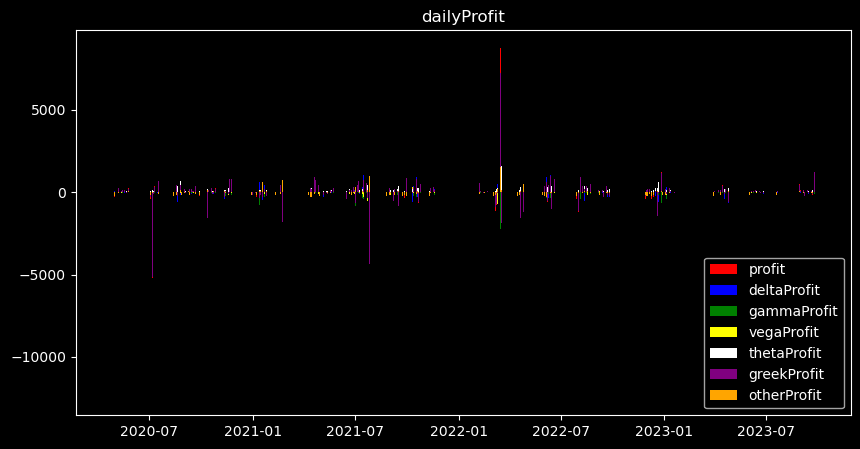

In [29]:
deltaProfit = dailyProfit['deltaProfit'].mean()
gammaProfit = dailyProfit['gammaProfit'].mean()
vegaProfit = dailyProfit['vegaProfit'].mean()
thetaProfit = dailyProfit['thetaProfit'].mean()
greekProfit = dailyProfit['greekProfit'].mean()
print('deltaProfit:', deltaProfit)
print('gammaProfit:', gammaProfit)
print('vegaProfit:', vegaProfit)
print('thetaProfit:', thetaProfit)
print('greekProfit:', greekProfit)
# 柱状图可视化，横轴为pd.to_datetime(dailyProfit['datetime'])，纵轴为几种收益
plt.figure(figsize=(10,5))
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['profit'], color='red', label='profit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['deltaProfit'], color='blue', label='deltaProfit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['gammaProfit'], color='green', label='gammaProfit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['vegaProfit'], color='yellow', label='vegaProfit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['thetaProfit'], color='white', label='thetaProfit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['greekProfit'], color='purple', label='greekProfit')
plt.bar(pd.to_datetime(dailyProfit['datetime']), dailyProfit['otherProfit'], color='orange', label='otherProfit')  
plt.legend()
plt.title('dailyProfit')
plt.show()

## 策略评估

In [30]:
tradeInfo.to_csv('tradeInfo.csv', index=False)

In [31]:
len(tradeInfo)

1162

In [32]:
dailyProfit['profit'].describe()

count     411.000000
mean        9.561240
std       934.276127
min     -8394.762843
25%      -188.557124
50%        25.066524
75%       230.926487
max      8770.518644
Name: profit, dtype: float64

In [33]:
# 胜率
len(dailyProfit[dailyProfit['profit']>0]) / len(dailyProfit)

0.5450121654501217

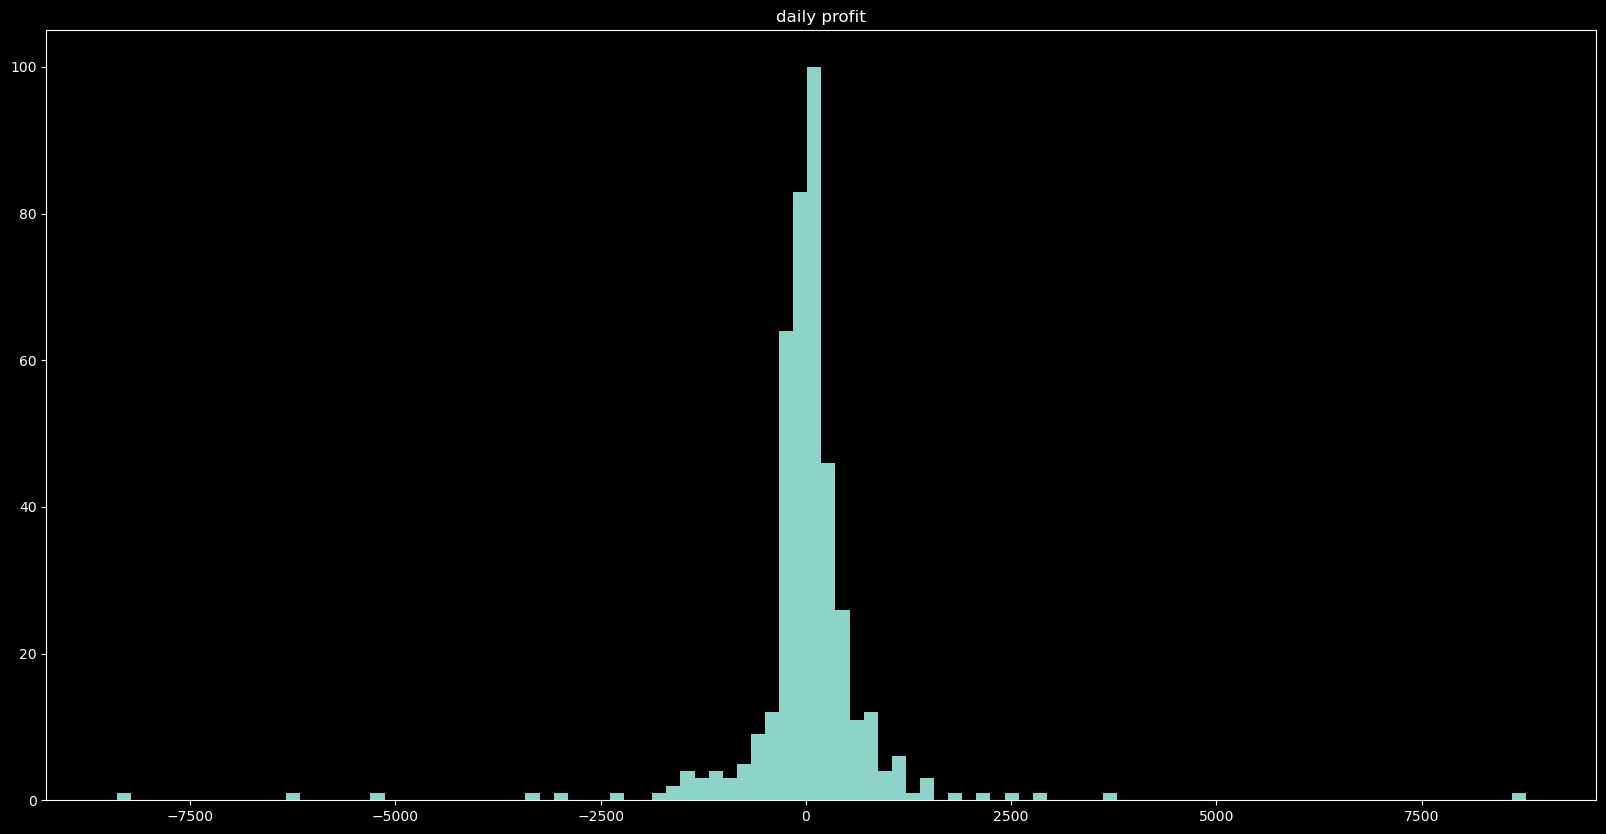

In [34]:
# 可视化分布
plt.figure(figsize=(20,10))
plt.hist(dailyProfit['profit'], bins=100)
plt.title('daily profit')
plt.show()

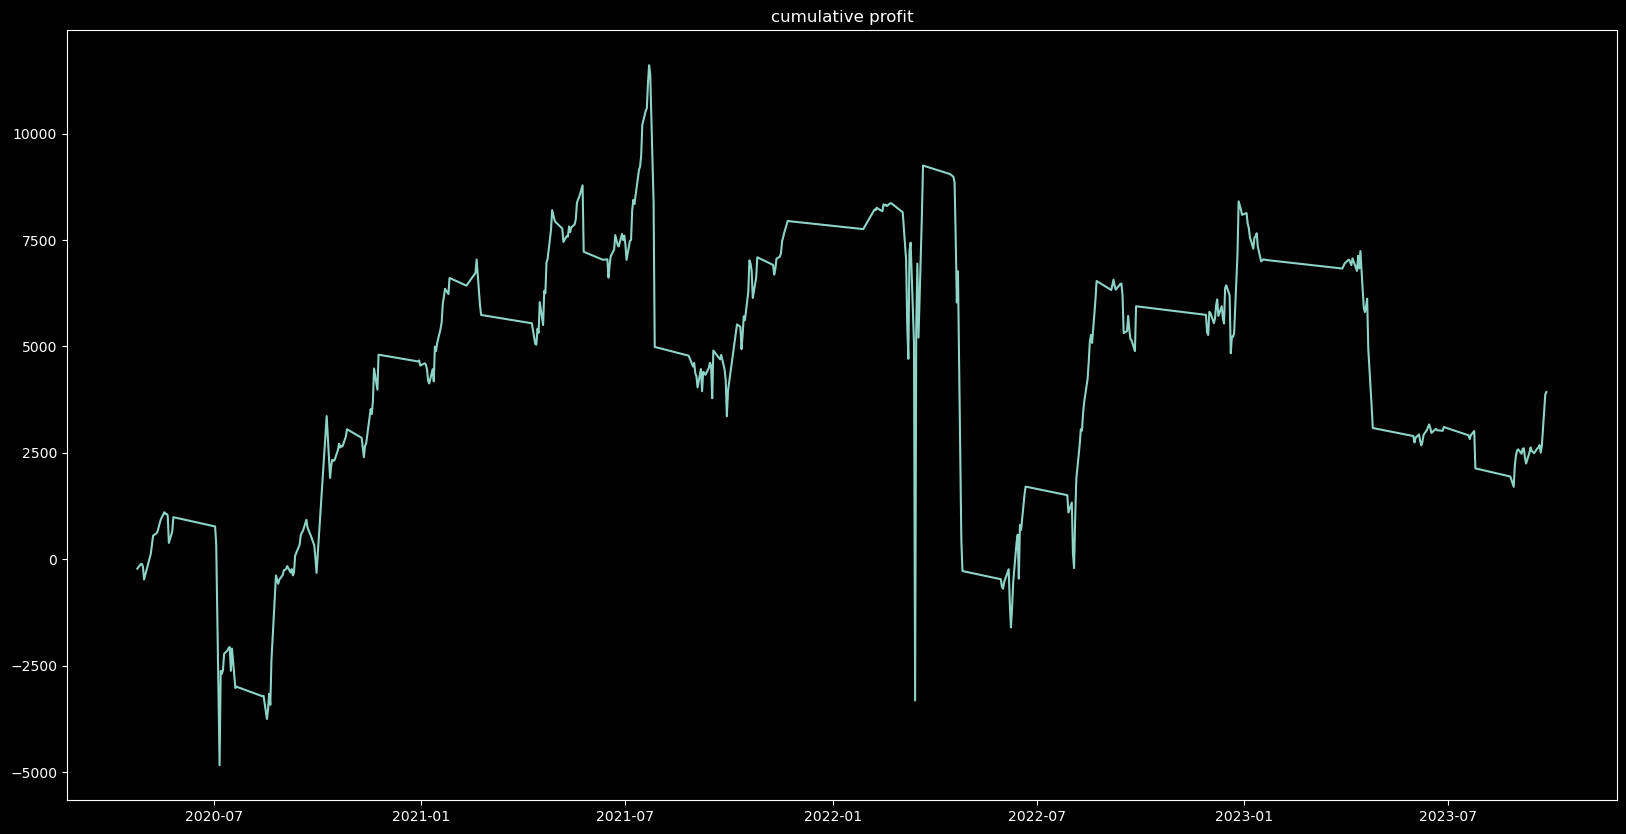

In [35]:
# 计算累计收益
dailyProfit['cumProfit'] = dailyProfit['profit'].cumsum()
# 可视化
plt.figure(figsize=(20,10))
plt.plot(dailyProfit['datetime'], dailyProfit['cumProfit'])
plt.title('cumulative profit')
plt.show()